In [7]:
#Step 1:loading data
import pandas as pd

# Load the CSV file
df = pd.read_excel('OnlineRetail.xlsx')

# Display the first few rows of the dataframe
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
#Step 2:Data cleaning
# Check for missing values
df.isnull().sum()

# Drop rows with missing CustomerID
df.dropna(subset=['CustomerID'], inplace=True)

# Drop unnecessary columns
df.drop(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate'], axis=1, inplace=True)

# Display the first few rows of the cleaned dataframe
df.head()


,Quantity,UnitPrice,CustomerID,Country
0,6,2.55,17850.0,United Kingdom
1,6,3.39,17850.0,United Kingdom
2,8,2.75,17850.0,United Kingdom
3,6,3.39,17850.0,United Kingdom
4,6,3.39,17850.0,United Kingdom


In [10]:
#Step 3:Feature Engineering
# Convert CustomerID to a categorical feature
import numpy as np
df['CustomerID'] = df['CustomerID'].astype('int')

# Aggregate data by CustomerID
customer_df = df.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean'
}).reset_index()

# Create a target variable 'Purchase' which we assume here as a binary variable (0 or 1)
# Assuming customers who bought more than a threshold quantity as 'Purchase' for simplicity
threshold_quantity = 10
customer_df['Purchase'] = np.where(customer_df['Quantity'] > threshold_quantity, 1, 0)

# Display the first few rows of the customer dataframe
customer_df.head()


,CustomerID,Quantity,UnitPrice,Purchase
0,12346,0,1.040000,0
1,12347,2458,2.644011,1
2,12348,2341,5.764839,1
3,12349,631,8.289041,1
4,12350,197,3.841176,1


In [11]:
#Step 4: Split Data
from sklearn.model_selection import train_test_split

# Features and target variable
X = customer_df[['Quantity', 'UnitPrice']]
y = customer_df['Purchase']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((3497, 2), (875, 2), (3497,), (875,))

In [20]:
#Step 5: Train the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay

# Initialize the model
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)


Confusion Matrix:
[[ 15   0]
 [  0 860]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00       860

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.00      1.00       875


Accuracy: 1.0


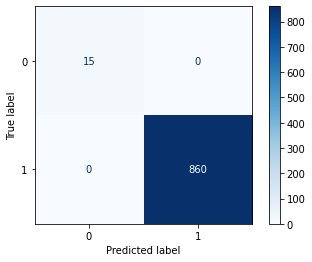

In [21]:
#Step 6: Evaluate the Model
# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()



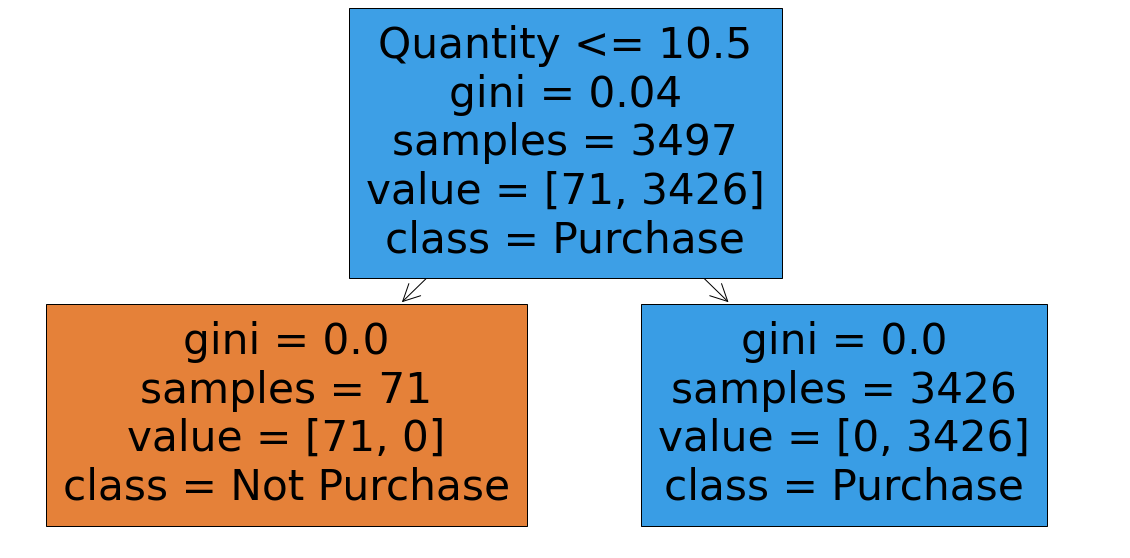

In [14]:
#Step 7: Visualize the Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=['Quantity', 'UnitPrice'], class_names=['Not Purchase', 'Purchase'], filled=True)
plt.show()
